In [1]:
# https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_session.html
# https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_lfp_analysis.html

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot

C:\Users\sarfi\anaconda3\envs\allendata\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
output_dir = Path.home() / 'Desktop' / 'ecephys_data'

cache = EcephysProjectCache.from_warehouse(manifest=output_dir / 'manifest.json')

print(cache.get_all_session_types())

['brain_observatory_1.1', 'functional_connectivity']


In [4]:
sessions = cache.get_session_table()
brain_observatory_type_sessions = sessions[sessions["session_type"] == "functional_connectivity"]
# brain_observatory_type_sessions.tail()

In [5]:
brain_observatory_type_sessions.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
766640955,2019-10-03T00:00:00Z,744912849,functional_connectivity,133.0,M,wt/wt,842,2233,6,"[MB, APN, NOT, DG, CA1, VISam, nan, PF, TH, LP..."
767871931,2019-10-03T00:00:00Z,753795610,functional_connectivity,135.0,M,wt/wt,713,2231,6,"[MRN, APN, MB, DG, CA1, VISrl, nan, VISam, PO,..."
768515987,2019-10-03T00:00:00Z,754477358,functional_connectivity,136.0,M,wt/wt,802,2217,6,"[MB, APN, NOT, DG, CA1, VISam, nan, Eth, LP, P..."
771160300,2019-10-03T00:00:00Z,754488979,functional_connectivity,142.0,M,wt/wt,930,2230,6,"[SCig, PPT, NOT, SUB, ProS, CA1, VISam, nan, A..."
771990200,2019-10-03T00:00:00Z,756578435,functional_connectivity,108.0,M,wt/wt,546,2229,6,"[APN, MB, DG, CA1, VISam, nan, PO, LP, VISpm, ..."


In [6]:
session_id = 766640955
session = cache.get_session_data(session_id)

In [7]:
session.structurewise_unit_counts

CA1       163
LP        101
LGd        76
VISal      65
APN        64
DG         59
VISmma     59
VISam      56
VISp       52
VISrl      37
VISl       34
VPM        25
MB         21
CA3        16
TH         13
NOT         1
Name: ecephys_structure_acronym, dtype: int64

### Creating a PSTH

In [8]:
presentations = session.get_stimulus_table("flashes")
presentations.head()

,color,contrast,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3647,1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1276.359894,1.0,flashes,1276.610090,0.250196,244
3648,-1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1278.361534,1.0,flashes,1278.611740,0.250206,245
3649,-1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1280.363164,1.0,flashes,1280.613382,0.250218,245
3650,-1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1282.364904,1.0,flashes,1282.615107,0.250203,245
3651,-1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1284.366574,1.0,flashes,1284.616777,0.250203,245


In [9]:
presentations['stimulus_name'].unique()

array(['flashes'], dtype=object)

In [10]:
print(f'Number of units in session {session_id} = {len(session.units)}')
session.units.head()

Number of units in session 766640955 = 842


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950911624,0.451580,156.94965,0.000344,2,127.43,5.128493,8.905862,0.026995,105.642029,0.000127,...,313.0,MB,8121.0,3321.0,6562.0,probeA,See electrode locations,29999.968499,1249.998687,True
950911641,0.794832,144.38775,0.000609,3,318.83,5.588427,9.531874,0.000842,111.293247,0.000238,...,313.0,MB,8119.0,3312.0,6563.0,probeA,See electrode locations,29999.968499,1249.998687,True
950911686,0.263552,132.55983,0.045403,6,271.37,3.977572,19.019987,0.006341,103.608231,0.003470,...,313.0,MB,8111.0,3287.0,6567.0,probeA,See electrode locations,29999.968499,1249.998687,True
950911657,0.340280,108.66375,0.042647,4,185.38,4.761646,7.271007,0.020972,91.041858,0.000744,...,313.0,MB,8114.0,3295.0,6565.0,probeA,See electrode locations,29999.968499,1249.998687,True
950911696,0.590669,186.91374,0.002805,7,216.73,5.187974,8.191716,0.015953,68.792457,0.001647,...,313.0,MB,8103.0,3262.0,6570.0,probeA,See electrode locations,29999.968499,1249.998687,True


In [11]:
units = session.units[session.units["ecephys_structure_acronym"] == 'VISp']
print(len(units))

52


In [12]:
units.columns

Index(['waveform_PT_ratio', 'waveform_amplitude', 'amplitude_cutoff',
       'cluster_id', 'cumulative_drift', 'd_prime', 'firing_rate',
       'isi_violations', 'isolation_distance', 'L_ratio', 'local_index',
       'max_drift', 'nn_hit_rate', 'nn_miss_rate', 'peak_channel_id',
       'presence_ratio', 'waveform_recovery_slope',
       'waveform_repolarization_slope', 'silhouette_score', 'snr',
       'waveform_spread', 'waveform_velocity_above', 'waveform_velocity_below',
       'waveform_duration', 'filtering', 'probe_channel_number',
       'probe_horizontal_position', 'probe_id', 'probe_vertical_position',
       'structure_acronym', 'ecephys_structure_id',
       'ecephys_structure_acronym', 'anterior_posterior_ccf_coordinate',
       'dorsal_ventral_ccf_coordinate', 'left_right_ccf_coordinate',
       'probe_description', 'location', 'probe_sampling_rate',
       'probe_lfp_sampling_rate', 'probe_has_lfp_data'],
      dtype='object')

In [13]:
time_step = 0.01
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

histograms.coords

Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3647 ... 3796
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.095 ... 0.495
  * unit_id                          (unit_id) int64 950929283 ... 950931035

In [14]:
histograms

<xarray.DataArray 'spike_counts' (stimulus_presentation_id: 150, time_relative_to_stimulus_onset: 60, unit_id: 52)>
array([[[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [1, 1, 0, ..., 0, 0, 1]],

       [[0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [2, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]],

       [[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]]], dtype=uint16)
Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3647 ... 3796
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.095 ... 0.495
  * unit_id                          (unit_id) int64 950929283 ... 950931035

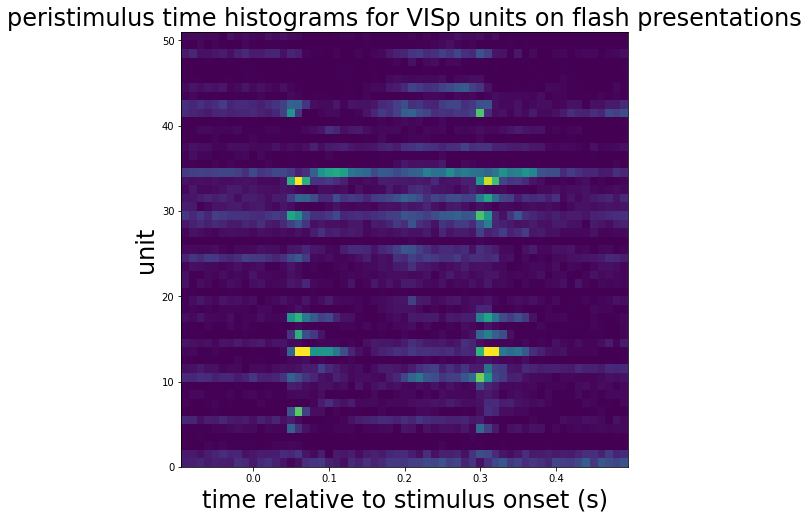

In [15]:
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on flash presentations", fontsize=24)

plt.show()

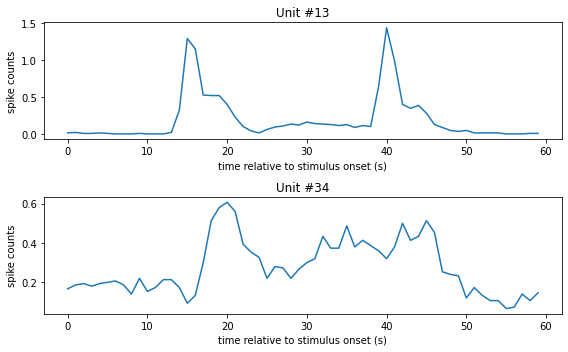

In [16]:
fig,ax = plt.subplots(2,1, figsize=(8,5))
ax[0].plot(mean_histograms.data[:,13])
ax[0].set_xlabel("time relative to stimulus onset (s)")
ax[0].set_ylabel("spike counts")
ax[0].set_title("Unit #13")

ax[1].plot(mean_histograms.data[:,34])
ax[1].set_xlabel("time relative to stimulus onset (s)")
ax[1].set_ylabel("spike counts")
ax[1].set_title("Unit #34")

plt.tight_layout()

### LFPs

In [17]:
session.probes

,description,location,sampling_rate,lfp_sampling_rate,has_lfp_data
id,,,,,
773592315,probeA,See electrode locations,29999.968499,1249.998687,True
773592318,probeB,See electrode locations,29999.918781,1249.996616,True
773592320,probeC,See electrode locations,29999.996176,1249.999841,True
773592324,probeD,See electrode locations,29999.918884,1249.996620,True
773592328,probeE,See electrode locations,30000.001302,1250.000054,True
773592330,probeF,See electrode locations,30000.038718,1250.001613,True


Each probe has a unique ID, but the "description" of each probe is assigned based on its location on the recording rig. The Allen Institute Neuropixels rigs have six slot for probes, which are named A, B, C, D, E, and F. The probes are arranged in a ring centered on visual cortex. Probe A is in the anterior/medial position, and the letters go clockwise around the ring.

In [18]:
session.channels.columns

Index(['filtering', 'probe_channel_number', 'probe_horizontal_position',
       'probe_id', 'probe_vertical_position', 'structure_acronym',
       'ecephys_structure_id', 'ecephys_structure_acronym',
       'anterior_posterior_ccf_coordinate', 'dorsal_ventral_ccf_coordinate',
       'left_right_ccf_coordinate'],
      dtype='object')

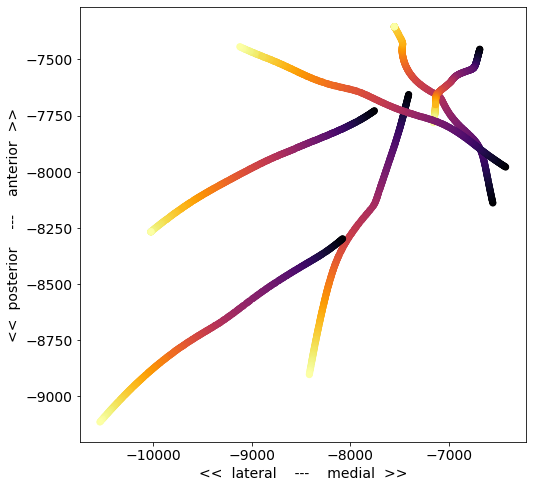

In [19]:
plt.rcParams.update({'font.size': 14})

x_coords = session.channels.left_right_ccf_coordinate
y_coords = session.channels.anterior_posterior_ccf_coordinate
color = session.channels.probe_vertical_position

plt.figure(figsize=(8,8))
_ = plt.scatter(-x_coords[x_coords > 0], -y_coords[x_coords > 0], c=color[x_coords > 0], cmap='inferno')
_ = plt.xlabel('<<  lateral    ---    medial  >>')
_ = plt.ylabel('<<  posterior    ---    anterior  >>')

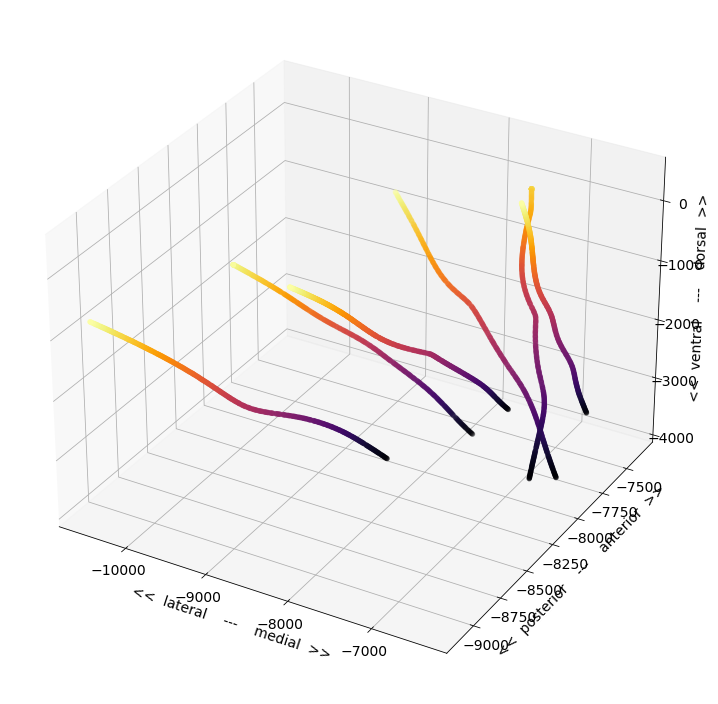

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y, and z coordinates into separate arrays
x = session.channels.left_right_ccf_coordinate
y = session.channels.anterior_posterior_ccf_coordinate
z = session.channels.dorsal_ventral_ccf_coordinate
color = session.channels.probe_vertical_position

# Initialize the 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")

# Set the axis labels
ax.set_xlabel("<<  lateral    ---    medial  >>")
ax.set_ylabel("<<  posterior    ---    anterior  >>")
ax.set_zlabel("<<  ventral    ---    dorsal  >>")

# Plot the track
ax.scatter(-x[x > 0], -y[x > 0], -z[x > 0], c=color[x > 0], cmap='inferno')

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
lfp_data = session.get_lfp(probe_id=773592315)

In [22]:
lfp_data.shape

(12254156, 88)

In [23]:
session.probes[session.probes.index==773592315]['lfp_sampling_rate'].item()

1249.99868744608

In [24]:
sampling_rate = session.probes[session.probes.index==773592315]['lfp_sampling_rate'].item()  # in Hz
spatial_resolution = 25  # in micrometers

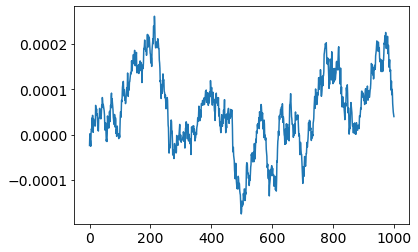

In [25]:
plt.plot(lfp_data[:1000,10]) # channel 10 out of 88?

### current source density

In [26]:
# csd = np.diff(np.diff(lfp_data.data, axis=0), axis=0) * (sampling_rate**2) / (spatial_resolution**2)

In [27]:
csd = session.get_current_source_density(773592315)
csd

<xarray.DataArray 'CSD' (virtual_channel_index: 384, time: 875)>
array([[ 7.10246642e+03,  7.33230419e+03,  7.51695244e+03, ...,
         1.96747588e+03, -3.34514489e+03, -9.15663668e+03],
       [ 9.48359615e+02, -2.44622401e+03, -5.58079003e+03, ...,
         3.31072694e+03,  3.71508333e+03,  4.24600802e+03],
       [ 1.69288071e+02, -5.73814210e+03, -1.12171840e+04, ...,
         4.99470395e+03,  5.55141596e+03,  6.27957701e+03],
       ...,
       [-1.87995853e+03, -7.88375422e+03, -1.35287159e+04, ...,
         5.60306889e+03,  2.93484896e+03,  1.12736219e+02],
       [-1.47603042e+05, -1.19839586e+05, -9.37896864e+04, ...,
         4.10170074e+04,  4.65750519e+04,  5.29692573e+04],
       [ 1.52386903e+05,  1.38048912e+05,  1.24609350e+05, ...,
        -5.19146207e+04, -5.20530511e+04, -5.26570164e+04]])
Coordinates:
  * virtual_channel_index  (virtual_channel_index) int32 0 1 2 3 ... 381 382 383
  * time                   (time) float64 -0.1 -0.0996 -0.0992 ... 0.2492 0.2496
    vertical_position      (virtual_channel_index) float64 0.0 10.0 ... 3.83e+03
    horizontal_position    (virtual_channel_index) float64 24.0 24.0 ... 24.0

<Figure size 720x720 with 0 Axes>

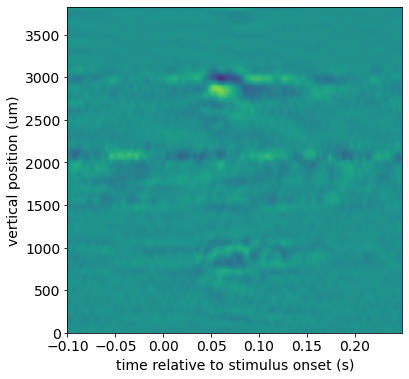

In [28]:
from scipy.ndimage.filters import gaussian_filter

_ = plt.figure(figsize=(10,10))

filtered_csd = gaussian_filter(csd.data, sigma=(5,1))

fig, ax = plt.subplots(figsize=(6, 6))

_ = ax.pcolor(csd["time"], csd["vertical_position"], filtered_csd, vmin=-3e4, vmax=3e4)

_ = ax.set_xlabel("time relative to stimulus onset (s)")
_ = ax.set_ylabel("vertical position (um)")

### Choosing recording sessions

In [29]:
pd.set_option("display.max_columns", None)

In [30]:
sessions_df = cache.get_session_table()
print(sessions_df.shape)
print(sessions_df.columns)

(58, 10)
Index(['published_at', 'specimen_id', 'session_type', 'age_in_days', 'sex',
       'full_genotype', 'unit_count', 'channel_count', 'probe_count',
       'ecephys_structure_acronyms'],
      dtype='object')


In [31]:
# list(sessions_df['ecephys_structure_acronyms'])
session_acronyms_dict = {k:list(v['ecephys_structure_acronyms']) for k,v in sessions_df.iterrows()}
print(session_acronyms_dict)

{715093703: ['CA1', 'VISrl', nan, 'PO', 'LP', 'LGd', 'CA3', 'DG', 'VISl', 'PoT', 'VISp', 'grey', 'VISpm', 'APN', 'MB', 'VISam'], 719161530: ['TH', 'Eth', 'APN', 'POL', 'LP', 'DG', 'CA1', 'VISpm', nan, 'NOT', 'MB', 'SUB', 'VISp', 'VISam', 'grey', 'VL', 'CA3', 'CA2', 'VISl', 'PO', 'VPM', 'LGd', 'VISal', 'VISrl'], 721123822: ['MB', 'SCig', 'PPT', 'NOT', 'DG', 'CA1', 'VISam', nan, 'LP', 'VIS', 'ProS', 'VISp', 'LGv', 'CA3', 'VISl', 'APN', 'POL', 'LGd', 'HPF', 'VISal', 'VISrl'], 732592105: ['grey', 'VISpm', nan, 'VISp', 'VISl', 'VISal', 'VISrl'], 737581020: ['grey', 'VISmma', nan, 'VISpm', 'VISp', 'VISl', 'VISrl'], 739448407: ['grey', 'VISam', nan, 'VIS', 'VISp', 'VISl', 'VISrl'], 742951821: ['VISal', nan, 'grey', 'VISl', 'VISrl', 'VISp', 'VISpm', 'VIS'], 743475441: ['LP', 'LGd', 'HPF', 'DG', 'CA3', 'CA1', 'VISrl', nan, 'PP', 'PIL', 'TH', 'MGv', 'VISl', 'ProS', 'SUB', 'VISp', 'PO', 'Eth', 'VISmma', 'APN', 'VISam'], 744228101: ['Eth', 'TH', 'LP', 'POL', 'APN', 'DG', 'CA1', 'VIS', nan, 'CA3', 

In [32]:
# VISpm, VISp, RSP, dLGN, LP

In [33]:
sessions_df[sessions_df.index==719161530]

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."


In [34]:
cache.get_probes()[cache.get_probes()['ecephys_session_id']==719161530]

,ecephys_session_id,lfp_sampling_rate,name,phase,sampling_rate,has_lfp_data,unit_count,channel_count,ecephys_structure_acronyms
id,,,,,,,,,
729445648,719161530,1249.998642,probeA,3a,29999.967418,True,87,374,"[APN, LP, MB, DG, CA1, VISam, nan]"
729445650,719161530,1249.996620,probeB,3a,29999.918880,True,202,368,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan]"
729445652,719161530,1249.999897,probeC,3a,29999.997521,True,207,373,"[APN, NOT, MB, DG, SUB, VISp, nan]"
729445654,719161530,1249.996707,probeD,3a,29999.920963,True,93,358,"[grey, VL, CA3, CA2, CA1, VISl, nan]"
729445656,719161530,1249.999979,probeE,3a,29999.999500,True,138,370,"[PO, VPM, TH, LP, LGd, CA3, DG, CA1, VISal, nan]"
729445658,719161530,1250.001693,probeF,3a,30000.040644,True,28,371,"[DG, CA1, VISrl, nan]"


In [35]:
units_df = cache.get_units()
print(len(units_df))
units_df.head()

40010


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cumulative_drift,d_prime,waveform_duration,ecephys_channel_id,firing_rate,waveform_halfwidth,isi_violations,isolation_distance,L_ratio,max_drift,nn_hit_rate,nn_miss_rate,presence_ratio,waveform_recovery_slope,waveform_repolarization_slope,silhouette_score,snr,waveform_spread,waveform_velocity_above,waveform_velocity_below,ecephys_probe_id,local_index,probe_horizontal_position,probe_vertical_position,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,ecephys_structure_id,ecephys_structure_acronym,ecephys_session_id,lfp_sampling_rate,name,phase,sampling_rate,has_lfp_data,date_of_acquisition,published_at,specimen_id,session_type,age_in_days,sex,genotype
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
915956282,0.611816,164.878740,0.072728,309.71,3.910873,0.535678,850229419,6.519432,0.164824,0.104910,30.546900,0.013865,27.10,0.898126,0.001599,0.99,-0.087545,0.480915,0.102369,1.911839,30.0,0.000000,NaN,733744647,3,27,40,NaN,NaN,NaN,8.0,grey,732592105,1249.996475,probeB,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956340,0.439372,247.254345,0.000881,160.24,5.519024,0.563149,850229419,9.660554,0.206030,0.006825,59.613182,0.000410,7.79,0.987654,0.000903,0.99,-0.104196,0.704522,0.197458,3.357908,30.0,0.000000,NaN,733744647,3,27,40,NaN,NaN,NaN,8.0,grey,732592105,1249.996475,probeB,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956345,0.500520,251.275830,0.001703,129.36,3.559911,0.521943,850229419,12.698430,0.192295,0.044936,47.805714,0.008281,11.56,0.930000,0.004956,0.99,-0.153127,0.781296,0.138827,3.362198,30.0,0.343384,NaN,733744647,3,27,40,NaN,NaN,NaN,8.0,grey,732592105,1249.996475,probeB,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956349,0.424620,177.115380,0.096378,169.29,2.973959,0.508208,850229419,16.192413,0.192295,0.120715,54.635515,0.010406,14.87,0.874667,0.021636,0.99,-0.086022,0.553393,0.136901,2.684636,40.0,0.206030,NaN,733744647,3,27,40,NaN,NaN,NaN,8.0,grey,732592105,1249.996475,probeB,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956356,0.512847,214.954545,0.054706,263.01,2.936851,0.549414,850229419,2.193113,0.233501,0.430427,18.136302,0.061345,18.37,0.637363,0.000673,0.99,-0.106051,0.632977,0.108867,2.605408,60.0,-0.451304,NaN,733744647,3,27,40,NaN,NaN,NaN,8.0,grey,732592105,1249.996475,probeB,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt


In [36]:
# relevant fields
# ecephys_session_id, ecephys_probe_id, has_lfp_data, ecephys_structure_acronym

In [37]:
def get_unit_session_summary(areas):
    for session_id in units_df['ecephys_session_id'].unique():
        print('=================================')
        print(f'Session {session_id}')
        for probe_id in units_df[units_df['ecephys_session_id']==session_id]['ecephys_probe_id'].unique():
            temp_df = units_df[(units_df['ecephys_session_id']==session_id) & (units_df['ecephys_probe_id']==probe_id)]
            print('=================')
            print(f"Probe {probe_id} | LFP data = {temp_df['has_lfp_data'].unique()[0]}")
            for area in areas:
                print(f"{area} units = {len(temp_df[temp_df['ecephys_structure_acronym']==area])}")

In [38]:
areas_of_interest = ['VISp', 'VISpm', 'LGd', 'LP']

get_unit_session_summary(areas_of_interest)

Session 732592105
Probe 733744647 | LFP data = True
VISp units = 0
VISpm units = 66
LGd units = 0
LP units = 0
Probe 733744649 | LFP data = True
VISp units = 110
VISpm units = 0
LGd units = 0
LP units = 0
Probe 733744651 | LFP data = True
VISp units = 0
VISpm units = 0
LGd units = 0
LP units = 0
Probe 733744653 | LFP data = True
VISp units = 0
VISpm units = 0
LGd units = 0
LP units = 0
Probe 733744655 | LFP data = True
VISp units = 0
VISpm units = 0
LGd units = 0
LP units = 0
Session 721123822
Probe 760213137 | LFP data = True
VISp units = 0
VISpm units = 0
LGd units = 0
LP units = 0
Probe 760213142 | LFP data = True
VISp units = 0
VISpm units = 0
LGd units = 0
LP units = 21
Probe 760213145 | LFP data = True
VISp units = 41
VISpm units = 0
LGd units = 0
LP units = 14
Probe 760213147 | LFP data = True
VISp units = 0
VISpm units = 0
LGd units = 0
LP units = 0
Probe 760213150 | LFP data = True
VISp units = 0
VISpm units = 0
LGd units = 0
LP units = 3
Probe 760213153 | LFP data = True
VISp

### Aligning to stimulus presentations

In [39]:
session.get_stimulus_epochs()

,start_time,stop_time,duration,stimulus_name,stimulus_block
0,15.289644,75.356384,60.066740,spontaneous,null
1,75.356384,987.351691,911.995307,gabors,0.0
2,987.351691,1276.359894,289.008203,spontaneous,null
3,1276.359894,1574.859290,298.499396,flashes,1.0
4,1574.859290,1636.660934,61.801644,spontaneous,null
5,1636.660934,2176.612116,539.951181,drifting_gratings_contrast,2.0
6,2176.612116,2297.212884,120.600769,spontaneous,null
7,2297.212884,3197.965544,900.752660,natural_movie_one_more_repeats,3.0
8,3197.965544,3498.216464,300.250920,natural_movie_one_shuffled,4.0
9,3498.216464,4397.968317,899.751853,drifting_gratings_75_repeats,5.0


In [40]:
session.get_stimulus_table(['flashes'])

,color,contrast,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3647,1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1276.359894,1.0,flashes,1276.610090,0.250196,244
3648,-1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1278.361534,1.0,flashes,1278.611740,0.250206,245
3649,-1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1280.363164,1.0,flashes,1280.613382,0.250218,245
3650,-1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1282.364904,1.0,flashes,1282.615107,0.250203,245
3651,-1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1284.366574,1.0,flashes,1284.616777,0.250203,245
...,...,...,...,...,...,...,...,...,...,...,...,...
3792,1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1566.602374,1.0,flashes,1566.852585,0.250211,244
3793,-1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1568.604024,1.0,flashes,1568.854242,0.250218,245
3794,1.0,0.8,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1570.605744,1.0,flashes,1570.855950,0.250206,244


In [41]:
session.stimulus_conditions.head()

,Dir,Speed,coherence,color,contrast,dotLife,dotSize,fieldPos,fieldShape,fieldSize,frame,mask,nDots,noiseDots,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
stimulus_condition_id,,,,,,,,,,,,,,,,,,,,,,,,,
0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,spontaneous,null,null,null,null,null
1,null,null,null,null,0.8,null,null,null,null,null,null,circle,null,null,1.0,0.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,20.0,30.0,"[1.0, 1.0, 1.0]"
2,null,null,null,null,0.8,null,null,null,null,null,null,circle,null,null,1.0,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,0.0,-20.0,"[1.0, 1.0, 1.0]"
3,null,null,null,null,0.8,null,null,null,null,null,null,circle,null,null,1.0,0.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,-20.0,20.0,"[1.0, 1.0, 1.0]"
4,null,null,null,null,0.8,null,null,null,null,null,null,circle,null,null,1.0,0.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,30.0,-20.0,"[1.0, 1.0, 1.0]"


In [42]:
session.stimulus_presentations.head()

,Dir,Speed,coherence,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,,,,
0,null,null,null,null,null,null,null,null,null,null,15.289644,null,spontaneous,75.356384,null,null,null,60.066740,0
1,null,null,null,null,0.8,null,0.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,75.356384,0.0,gabors,75.589910,4.0,20.0,30.0,0.233525,1
2,null,null,null,null,0.8,null,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,75.589910,0.0,gabors,75.840115,4.0,0.0,-20.0,0.250206,2
3,null,null,null,null,0.8,null,0.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,75.840115,0.0,gabors,76.090321,4.0,-20.0,20.0,0.250206,3
4,null,null,null,null,0.8,null,0.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,76.090321,0.0,gabors,76.340527,4.0,30.0,-20.0,0.250206,4


getting high snr units from VISp

In [43]:
units_with_very_high_snr = session.units[(session.units['snr'] > 1) & (session.units['ecephys_structure_acronym'] == 'VISp')]

getting ids of high snr units

In [44]:
 # grab an arbitrary (though high-snr!) unit (we made units_with_high_snr above)
high_snr_unit_ids = units_with_very_high_snr.index.values

print(f'{len(high_snr_unit_ids)} high SNR units selected.')

unit_id = high_snr_unit_ids[0]

print(f"{len(session.spike_times[unit_id])} spikes were detected for unit {unit_id} at times:")
session.spike_times[unit_id]

52 high SNR units selected.
124599 spikes were detected for unit 950929283 at times:


array([3.78179567e+00, 3.79076234e+00, 3.81126234e+00, ...,
       9.80694815e+03, 9.80699781e+03, 9.80702728e+03])

getting the ids of stimulus presentations of "flashes" type

In [45]:
temp_presentation_ids = session.stimulus_presentations.loc[session.stimulus_presentations['stimulus_name'] == 'flashes'].index.values
print(len(temp_presentation_ids))

150


getting spike times for selected stimulus ids and selected units

In [46]:
times = session.presentationwise_spike_times(
    stimulus_presentation_ids=temp_presentation_ids,
    unit_ids=high_snr_unit_ids
)

times.head()

,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset
spike_time,,,
1276.363925,3647,950929267,0.004030
1276.368358,3647,950931566,0.008464
1276.368858,3647,950930398,0.008964
1276.378858,3647,950930071,0.018964
1276.399725,3647,950930027,0.039830


This is a raster plot of spikes in response to just one flash stimulus presentation (id 3647) of 52 units in VISp with SNR > 1. This presentation starts at 1276.359894	s and ends at 1276.610090 s. The next one, id 3648, only starts at 1278.361534 s. This can be looked up in "session.get_stimulus_table(['flashes'])"

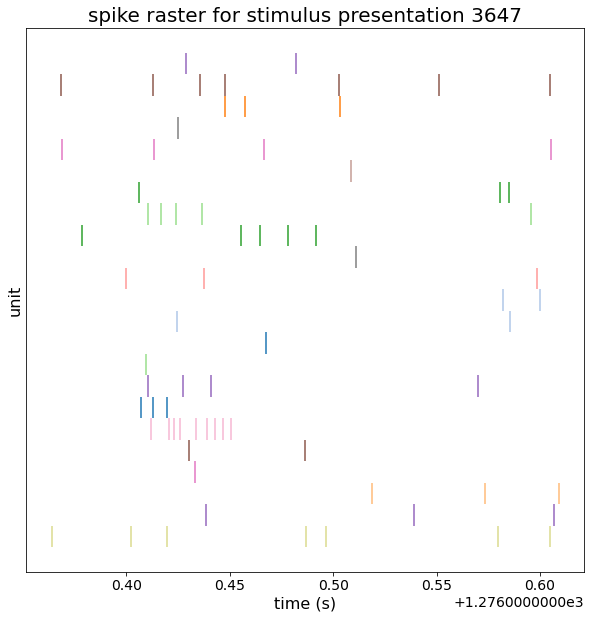

Dir                                null
Speed                              null
coherence                          null
color                               1.0
contrast                            0.8
frame                              null
orientation                         0.0
phase                        [0.0, 0.0]
size                     [300.0, 300.0]
spatial_frequency            [0.0, 0.0]
start_time                  1276.359894
stimulus_block                      1.0
stimulus_name                   flashes
stop_time                    1276.61009
temporal_frequency                 null
x_position                         null
y_position                         null
duration                       0.250196
stimulus_condition_id               244
Name: 3647, dtype: object

In [47]:
first_presentation_id = times['stimulus_presentation_id'].values[0]
plot_times = times[times['stimulus_presentation_id'] == first_presentation_id]

fig = raster_plot(plot_times, title=f'spike raster for stimulus presentation {first_presentation_id}', figsize=(10,10))
plt.show()

# also print out this presentation
session.stimulus_presentations.loc[first_presentation_id]

In [48]:
stats = session.conditionwise_spike_statistics(stimulus_presentation_ids=temp_presentation_ids, unit_ids=high_snr_unit_ids)
stats

,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,stimulus_condition_id,,,,,
950929267,244,165,75,2.200000,2.020169,0.233269
950929283,244,374,75,4.986667,4.319952,0.498825
950929299,244,6,75,0.080000,0.273120,0.031537
950929417,244,204,75,2.720000,2.239450,0.258589
950929433,244,38,75,0.506667,0.742045,0.085684
...,...,...,...,...,...,...
950931556,245,197,75,2.626667,1.194281,0.137904
950931566,245,432,75,5.760000,1.505306,0.173818
950931577,245,431,75,5.746667,2.547353,0.294143


In [49]:
print(f"Unique unit ids = {len(stats.index.get_level_values('unit_id').unique())}")
print(f"Unique stimulus condition ids = {len(stats.index.get_level_values('stimulus_condition_id').unique())}")

Unique unit ids = 52
Unique stimulus condition ids = 2


In [50]:
session.stimulus_presentations.loc[session.stimulus_presentations['stimulus_name'] == 'flashes']['stimulus_condition_id'].unique()

array([244, 245], dtype=int64)

There are 150 stimulus presentations 3647-3796, but only in two conditions: 244 and 245

In [51]:
# Jointly displaying statistics across units and conditions, and parameters of conditions
pd.merge(stats, session.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,Dir,Speed,coherence,color,contrast,dotLife,dotSize,fieldPos,fieldShape,fieldSize,frame,mask,nDots,noiseDots,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
950929267,244,165,75,2.200000,2.020169,0.233269,null,null,null,1.0,0.8,null,null,null,null,null,null,None,null,null,1.0,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",flashes,null,deg,null,null,null
950929283,244,374,75,4.986667,4.319952,0.498825,null,null,null,1.0,0.8,null,null,null,null,null,null,None,null,null,1.0,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",flashes,null,deg,null,null,null
950929299,244,6,75,0.080000,0.273120,0.031537,null,null,null,1.0,0.8,null,null,null,null,null,null,None,null,null,1.0,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",flashes,null,deg,null,null,null
950929417,244,204,75,2.720000,2.239450,0.258589,null,null,null,1.0,0.8,null,null,null,null,null,null,None,null,null,1.0,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",flashes,null,deg,null,null,null
950929433,244,38,75,0.506667,0.742045,0.085684,null,null,null,1.0,0.8,null,null,null,null,null,null,None,null,null,1.0,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",flashes,null,deg,null,null,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950931556,245,197,75,2.626667,1.194281,0.137904,null,null,null,-1.0,0.8,null,null,null,null,null,null,None,null,null,1.0,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",flashes,null,deg,null,null,null
950931566,245,432,75,5.760000,1.505306,0.173818,null,null,null,-1.0,0.8,null,null,null,null,null,null,None,null,null,1.0,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",flashes,null,deg,null,null,null
950931577,245,431,75,5.746667,2.547353,0.294143,null,null,null,-1.0,0.8,null,null,null,null,null,null,None,null,null,1.0,0.0,"[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",flashes,null,deg,null,null,null
